In [1]:
!pip install opencv-python

In [2]:
# Import packages
import cv2
import imutils
import numpy as пp
from google.colab.patches import cv2_imshow

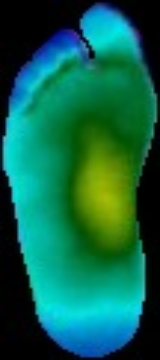

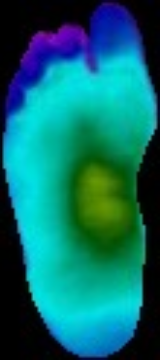

In [3]:
 # Load the two images (city)
img1 = cv2.imread("/content/1.jpeg")
img1 = cv2.resize(img1, (160, 360) )
img2 = cv2.imread("/content/2.jpeg")
img2 = cv2.flip(img2, 1)
img2 = cv2.resize(img2, (160,360) )
cv2_imshow(img1)
cv2_imshow(img2)


#cv2.waitKey(0)
#cv2.destroyAllWindows ()

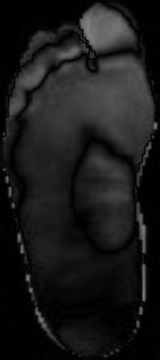

In [4]:
# Grayscale
gray1 = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
gray2 = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)
gray_img1 = gray1
gray_img2 = gray2
# Find the difference between the two images using absdiff
diff = cv2.absdiff(gray1, gray2)
cv2_imshow(diff)

# cv2_imshow(img1)
# cv2_imshow(img2)

# cv2.waitKey(0)
# cv2.destroyAllWindows()


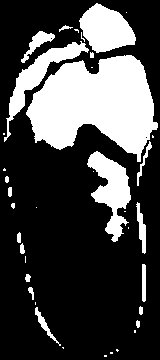

In [5]:
# Apply threshold
thresh = cv2.threshold(diff, 0, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)[1]
cv2_imshow(thresh)


In [6]:
# Dilation
# import numpy as np
# kernel = np.ones((6,6), np.uint16)
# dilate = cv2.dilate(thresh, kernel, iterations=0)
# cv2_imshow(dilate)

In [7]:
# Find contours
contours = cv2.findContours(thresh.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
contours = imutils.grab_contours(contours)

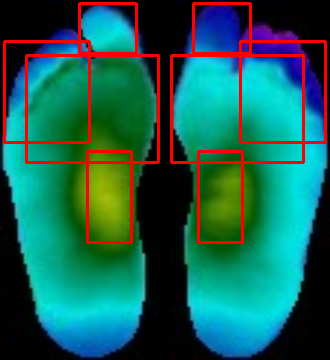

In [8]:
import numpy as np
# Loop over each contour
for contour in contours:
  if cv2.contourArea(contour) > 1000:
    # Calculate bounding box
    x, y, w, h= cv2.boundingRect (contour)
    # Draw rectangle - bounding box
    cv2.rectangle(img1, (x,y), (x+w, y+h), (0,0,255), 2)
    cv2.rectangle(img2, (x,y), (x+w, y+h), (0,0,255), 2)

# Show final images with differences
x = np.zeros((360,10,3), np.uint8)
result = np.hstack((img1, x, cv2.flip(img2, 1)))
cv2_imshow(result)

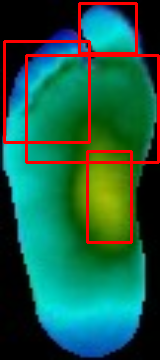

In [9]:

# Encontrar el píxel más brillante (representa la mayor temperatura)
max_temp_img1 = np.max(gray_img1)
max_temp_img2 = np.max(gray_img2)

if max_temp_img1 > max_temp_img2:
    img_to_plot = img1
else:
    img_to_plot = cv2.flip(img2, 1)

# Mostrar la imagen con la mayor temperatura
cv2_imshow(img_to_plot)
# cv2.waitKey(0)
# cv2.destroyAllWindows()